# MI
## Problem Set (Question 2)

### a) Gradient Descent


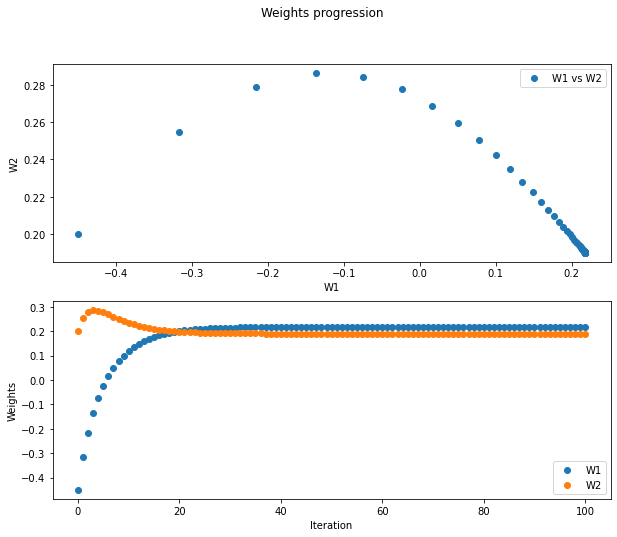

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

class Neuron:
    """
    Connectionist neuron that takes initial_weight and learns a good
    weight through different procedures.
    """
    def __init__(self, initial_weight, dataset, learning_rate=0.2, max_iterations=100):
        # 1. Initialize weights
        self.weight = initial_weight

        # 2. Initialize x, y_true
        self.x = np.array([[1,1,1], [d[0] for d in dataset]])
        self.y_true = np.array([d[1] for d in dataset])
        
        # 3. Initialize useful H value from dataset
        self.H = 1/len(self.y_true) * np.dot(self.x, self.x.transpose()) # (shape 2x2)
        
        # 4. Initialize learning_rate and max_iterations
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations


    def gradient(self):
        """
        Calculates the gradient using whole dataset (x, y_true)

        Return gradient (shape: 2x1)
        """
        p = len(self.y_true)
        return np.dot(self.H, self.weight) - (1/p * np.dot(self.x, self.y_true))
    
    def gradient_descent(self, plot=False):
        """
        Runs gradient descent algorithm
            new_weight = weight - (learning_rate * gradient)
        
        Returns new_weight (shape: 2x1)
        """
        weights = [self.weight]
        for i in range(self.max_iterations):
            new_weight = self.weight - (self.learning_rate * self.gradient())
            weights.append(new_weight)
            self.weight = new_weight
        if plot:
            self.plot(weights)
        return weights
    
    def plot(self, weights):
        """
        Takes weights array and plot it
        """
        fig, axs = plt.subplots(2, figsize=(10, 8))
        fig.suptitle('Weights progression')

        # Plot W1 vs W2
        x = [weight[0] for weight in weights]
        y = [weight[1] for weight in weights]
        axs[0].scatter(x, y, label = "W1 vs W2")

        # Plot iterations vs weights
        x = range(len(weights))
        y1 = [weight[0] for weight in weights]
        y2 = [weight[1] for weight in weights]
        axs[1].scatter(x, y1, label = "W1")
        axs[1].scatter(x, y2, label = "W2")

        # Cosmetic stuff
        axs[0].set_xlabel("W1")
        axs[0].set_ylabel("W2")
        axs[1].set_xlabel("Iteration")
        axs[1].set_ylabel("Weights")
        axs[0].legend()
        axs[1].legend()
        plt.show()


# Initializing dataset and initial_weight
dataset = [[-1, -0.1], [0.3 , 0.5], [2,0.5]]
initial_weight = np.array([-0.45, 0.2])

# Calculating gradient
w = Neuron(initial_weight, dataset).gradient_descent(plot=True)

### b) Line Search

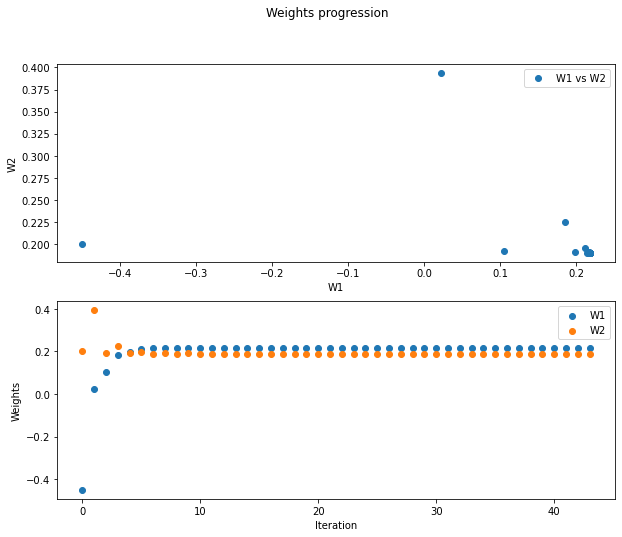

In [35]:
# Create new method line_search
def line_search(self, plot=False):
    """
    Runs gradient descent algorithm
        new_weight = weight - (learning_rate * gradient)
    where line_search = g_transpose . g / g_transpose . H . g

    Returns new_weight (shape: 2x1)
    """
    weights = [self.weight]
    for i in range(self.max_iterations):
        # 1. Calculate gradient and stop if equal zero
        gradient = self.gradient() # (shape 1x2)
        if np.all(gradient==0):
            break

        # 2. Calculate learning_rate
        learning_rate = np.dot(gradient.T, gradient) / np.dot(np.dot(gradient.T, self.H), gradient)
        
        # 3. Update weight
        new_weight = self.weight - (learning_rate * self.gradient())
        weights.append(new_weight)
        self.weight = new_weight
    if plot:
        self.plot(weights)
    return weights

# Attach the new method to existing Neuron class
Neuron.line_search = line_search

w = Neuron(initial_weight, dataset).line_search(plot=True)

### c) Conjugate Gradient

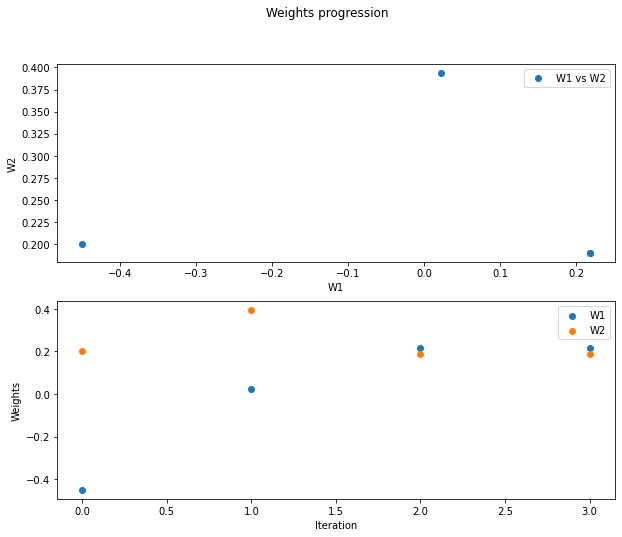

In [38]:
# Create new method conjugate_gradient
def conjugate_gradient(self, plot=False):
    """
    Runs gradient descent algorithm
        new_weight = weight - (learning_rate * gradient)
    where line_search = g_transpose . g / g_transpose . H . g

    Returns new_weight (shape: 2x1)
    """
    weights = [self.weight]
    gradient = self.gradient() # (shape 1x2)
    d = -1 * gradient
    for i in range(20):
        # 1. Calculate new weight
        learning_rate = -1 * np.dot(d.T, gradient) / np.dot(np.dot(d.T, self.H), d)
        new_weight = self.weight + (learning_rate * d)
        
        # 2. Update current weight
        self.weight = new_weight
        
        # 3. Calculate new d (and gradient)
        new_gradient = self.gradient()
        momentum = -1 * np.dot(new_gradient.T, new_gradient) / np.dot(gradient.T, gradient)
        d = new_gradient + (momentum * d)         
        
        # 4. Update current gradient
        gradient = new_gradient
        weights.append(new_weight)
        
        # 5. Stop if gradient is zero
        if np.all(gradient==0):
            break
    if plot:
        self.plot(weights)
    return weights

# Attach the new method to existing Neuron class
Neuron.conjugate_gradient = conjugate_gradient

w = Neuron(initial_weight, dataset).conjugate_gradient(plot=True)